# Financial Analysis of the American Automobile & Tech sector

This short analysis, provides an overview of the financial behavior of the american automobile sector for the last 3 years. To do so we intend to analyze specifically the market price of Ford and General Motors. 

We also want to analyze the relationship between Tesla and the two classic american automobile compagnies. Our intuition is that Tesla is perceived by investors as a tech company rather than a automobile company, we want to verify it with some corrolation analysis.

Lastely we are going to study the impact of the coronavirus crisis on the automobile and tech stock prices.

In [26]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
start = datetime.datetime(2017,1,3)
end = datetime.datetime(2020,1,3)


In [23]:
df_ford = web.DataReader('F','yahoo',start,end)
df_ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.077526
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.541780
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.221605
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.213601
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.109543


In [24]:
df_gm = web.DataReader('GM','yahoo',start,end)
df_gm.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,35.570000,34.840000,34.980000,35.150002,10904900.0,30.431576
2017-01-04,37.240002,35.470001,35.599998,37.090000,23388500.0,32.111160
2017-01-05,37.049999,36.070000,37.009998,36.389999,15636700.0,31.505117


In [30]:
df_tesla = web.DataReader('TSLA','yahoo',start,end)
df_tesla.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000


## First visualization overview - Automobile Industry

### Price analysis

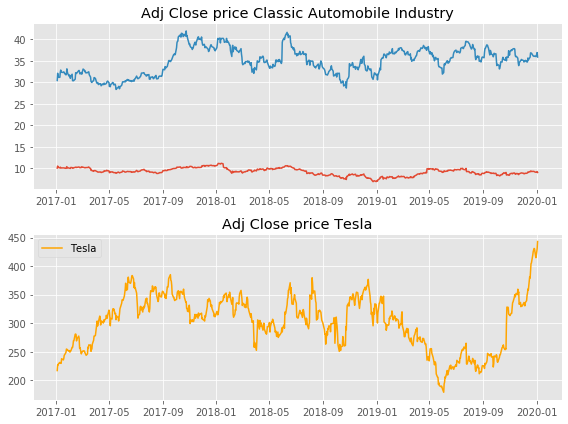

In [47]:
#Volume plot
fig, axes = plt.subplots(2,1,figsize=(8,6))
axes[0].plot(df_ford['Adj Close'],label='Ford')
axes[0].set_title('Adj Close price Classic Automobile Industry')
axes[0].plot(df_gm['Adj Close'],label='GM')
axes[1].plot(df_tesla['Adj Close'], label='Tesla',c='orange')
axes[1].set_title('Adj Close price Tesla')
plt.legend()
plt.tight_layout()

#### Commentary:
At first sight the volatility for Tesla stock price seems higher than for Ford and GM

### Volume analysis

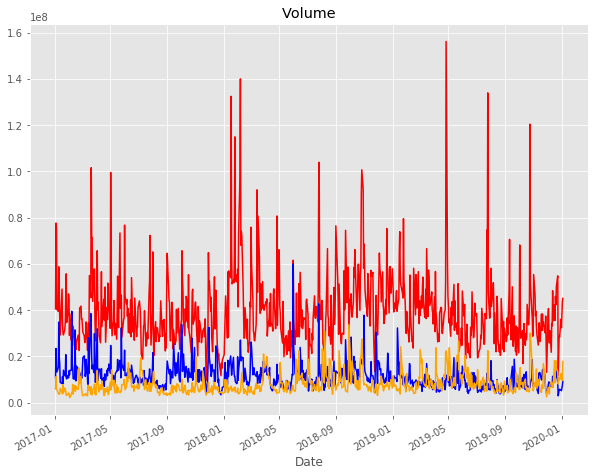

In [50]:
df_ford['Volume'].plot(figsize=(10,8),title='Volume',label='Ford',c='r')
df_gm['Volume'].plot(label='GM',c='b')
df_tesla['Volume'].plot(label='Tesla',c='orange')

### Estimation of total traded

In [51]:
df_ford['Total traded'] = df_ford['Adj Close'] * df_ford['Volume']
df_gm['Total traded'] = df_ford['Adj Close'] * df_ford['Volume']
df_tesla['Total traded'] = df_tesla['Adj Close'] * df_tesla['Volume']

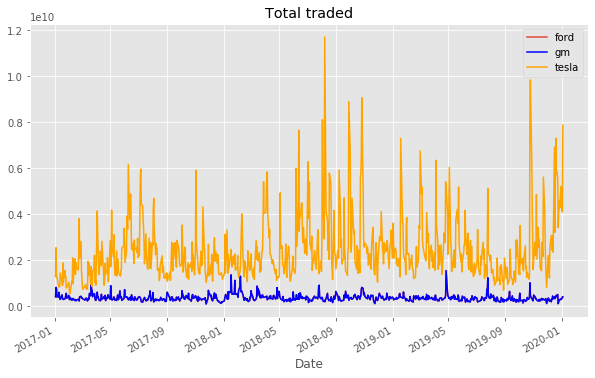

In [53]:
df_ford['Total traded'].plot(figsize=(10,6),title='Total traded',label='ford')
df_gm['Total traded'].plot(label='gm',c='b')
df_tesla['Total traded'].plot(label='tesla',c='orange')
plt.legend()

## Returns and Volatility analysis

In [55]:
df_ford['returns'] = (df_ford['Adj Close'] / df_ford['Adj Close'].shift(1)) -1
df_gm['returns'] = (df_gm['Adj Close'] / df_gm['Adj Close'].shift(1)) -1
df_tesla['returns'] = (df_tesla['Adj Close'] / df_tesla['Adj Close'].shift(1)) -1

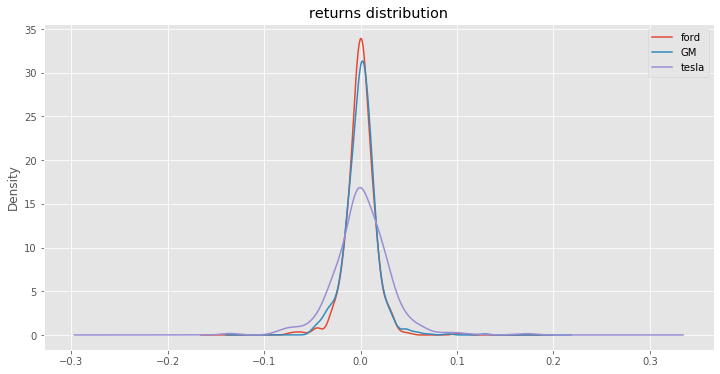

In [66]:
df_ford["returns"].plot(kind='kde',title='returns distribution',figsize=(12,6), label='ford')
df_gm['returns'].plot(kind='kde',label='GM')
df_tesla['returns'].plot(kind='kde',label='tesla')
plt.legend()

#### Commentary:
Visualy we notice immediatly that the kurtosis of ford and GM returns are very similar, whereas Tesla's kurtosis is much bigger. Tesla's volatility is higher.

In [68]:
df_box = pd.concat([df_ford['returns'],df_gm['returns'],df_tesla['returns']],axis=1)
df_box.columns = ['Ford returns','GM returns','Tesla returns']
df_box.head()

,Ford returns,GM returns,Tesla returns
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.046068,0.055192,0.046085
2017-01-05,-0.030372,-0.018873,-0.001057
2017-01-06,-0.000783,-0.010992,0.009967
2017-01-09,-0.010188,0.000556,0.009912


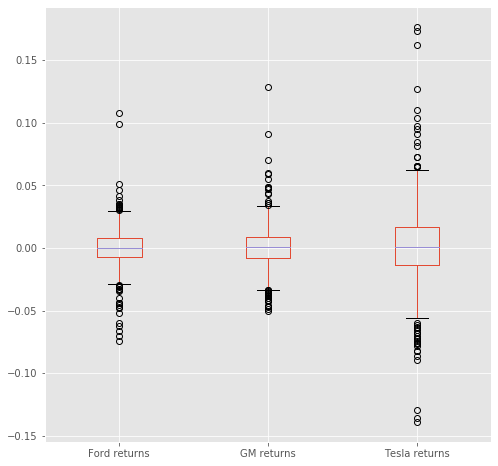

In [72]:
df_box.plot(kind='box',figsize=(8,8))

In [73]:
from pandas.plotting import scatter_matrix

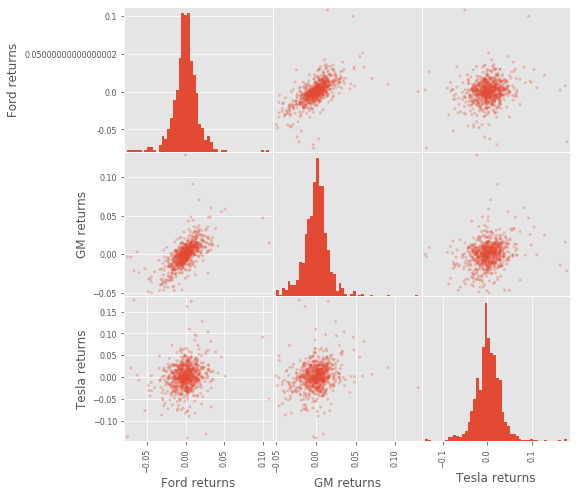

In [76]:
scatter_matrix(df_box,figsize=(8,8),alpha=0.3,hist_kwds={'bins':50});

In [77]:
df_box.corr()

,Ford returns,GM returns,Tesla returns
Ford returns,1.000000,0.624726,0.172857
GM returns,0.624726,1.000000,0.220504
Tesla returns,0.172857,0.220504,1.000000


#### Commentary:
Our graphic analysis and the calculation of the correlations show that Tesla's financial evolution is poorely linked to the evolution of Ford and GM. On the other hand Ford and GM share a fairly consistent correlation, some statiscal test could maybe confirm our view with more precision.

In [84]:
# the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_ford['Adj Close'].dropna()
data2 = df_gm['Adj Close'].dropna()
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')


stat=0.314, p=0.000
Probably dependent


The Person Correlation test confirms a significative correlation between ford and Gm.

In [83]:
# the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_ford['Adj Close'].dropna()
data2 = df_tesla['Adj Close'].dropna()
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.028, p=0.447
Probably independent


Whereas the relationship between the classical automobile constructors and Tesla seems unsignificent

## Second visualization overview : Tesla & Tech compagnies

Can we determine a significent correlation between the evolution of Tesla's stock price and the other Tech compagnies stock prices(Facebook and Google)?

In [88]:
df_goog = web.DataReader('GOOGL','yahoo',start,end)
df_goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,811.440002,796.890015,800.619995,808.010010,1959000,808.010010
2017-01-04,813.429993,804.109985,809.890015,807.770020,1515300,807.770020
2017-01-05,813.739990,805.919983,807.500000,813.020020,1340500,813.020020
2017-01-06,828.960022,811.500000,814.989990,825.210022,2017100,825.210022
2017-01-09,830.429993,821.619995,826.369995,827.179993,1408900,827.179993


In [90]:
df_fb = web.DataReader('FB','yahoo',start,end)
df_fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,117.839996,115.510002,116.029999,116.860001,20663900,116.860001
2017-01-04,119.660004,117.290001,117.550003,118.690002,19630900,118.690002
2017-01-05,120.949997,118.320000,118.860001,120.669998,19492200,120.669998
2017-01-06,123.879997,120.029999,120.980003,123.410004,28545300,123.410004
2017-01-09,125.430000,123.040001,123.550003,124.900002,22880400,124.900002


In [93]:
df_fb['returns'] = df_fb['Adj Close'].pct_change(1)
df_goog['returns'] = df_goog['Adj Close'].pct_change(1)


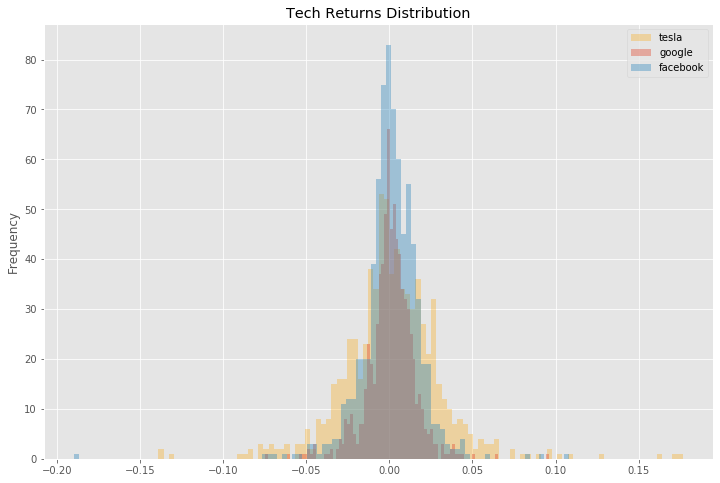

In [104]:
df_tesla['returns'].plot.hist(bins=100, alpha=0.3,label='tesla',color='orange')
df_goog['returns'].plot.hist(figsize=(12,8),bins=100,label='google',title='Tech Returns Distribution',alpha=0.4)
df_fb['returns'].plot.hist(bins=100,alpha=0.4, label='facebook')

plt.legend()


In [111]:
df_tech_box = pd.concat([df_tesla['Adj Close'],df_goog['Adj Close'],df_fb['Adj Close']],axis=1)
df_tech_box.columns = ['Tesla Adj Close','Goog Adj Close','FB Adj Close']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172E861E4C8>,
      dtype=object)

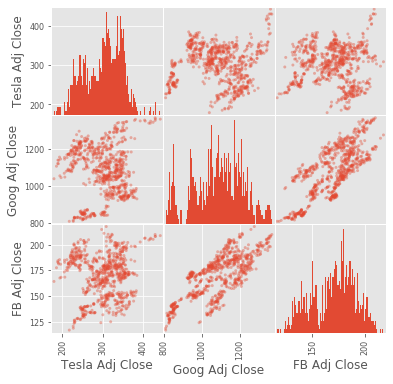

In [112]:
scatter_matrix(df_tech_box,alpha=0.4,figsize=(6,6),hist_kwds={'bins':100})

In [113]:
df_tech_box.corr()

,Tesla Adj Close,Goog Adj Close,FB Adj Close
Tesla Adj Close,1.000000,0.018457,0.034168
Goog Adj Close,0.018457,1.000000,0.741292
FB Adj Close,0.034168,0.741292,1.000000


Our intuition was partially right. Tesla isn't considered by investors as a regular car company. However there is no evidence that Tesla is financially considered as a tech company since the correlation is poor between Tesla's market price evolution and other tech compagnies. This is fairely 
understandable, since the economic structure on which rely Tesla and digital compagnies such as facebook are completly different. 

## Third Visualization overview : the Impact of coronavirus on automobile and tech compagnies

In [122]:
start = datetime.datetime(2019,11,1)
end = datetime.datetime(2020,5,3)

In [132]:
covid_ford = web.DataReader('F','yahoo',start,end)
covid_gm = web.DataReader('GM','yahoo',start,end)
covid_goog = web.DataReader('GOOGL','yahoo',start,end)
covid_fb = web.DataReader('FB','yahoo',start,end)
covid_tesla = web.DataReader('TSLA','yahoo',start,end)

In [133]:
covid_ford['Cumul Return'] = covid_ford['Adj Close'] / covid_ford.iloc[0]['Adj Close']
covid_gm['Cumul Return'] = covid_gm['Adj Close'] / covid_gm.iloc[0]['Adj Close']
covid_tesla['Cumul Return'] = covid_tesla['Adj Close'] / covid_tesla.iloc[0]['Adj Close']

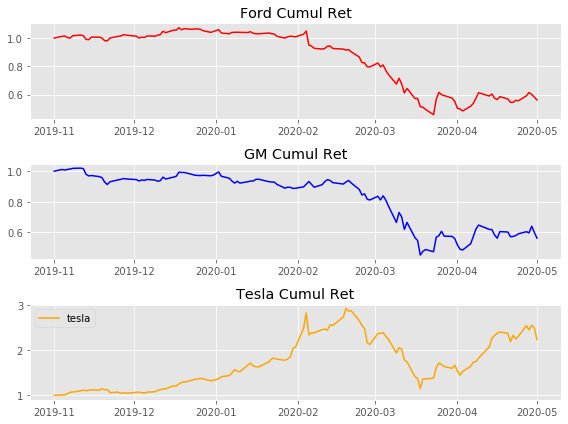

In [159]:
fig,axes= plt.subplots(3,1,figsize=(8,6))
axes[0].plot(covid_ford['Cumul Return'],label='ford',c='r')
axes[0].set_title("Ford Cumul Ret")

axes[1].plot(covid_gm['Cumul Return'],label='gm',c='b')
axes[1].set_title("GM Cumul Ret")

axes[2].plot(covid_tesla['Cumul Return'],label='tesla',c='orange')
axes[2].set_title("Tesla Cumul Ret")
plt.tight_layout()
plt.legend()

In [160]:
covid_fb['Cumul Return'] = covid_fb['Adj Close'] / covid_fb.iloc[0]['Adj Close']
covid_goog['Cumul Return'] = covid_goog['Adj Close'] / covid_goog.iloc[0]['Adj Close']


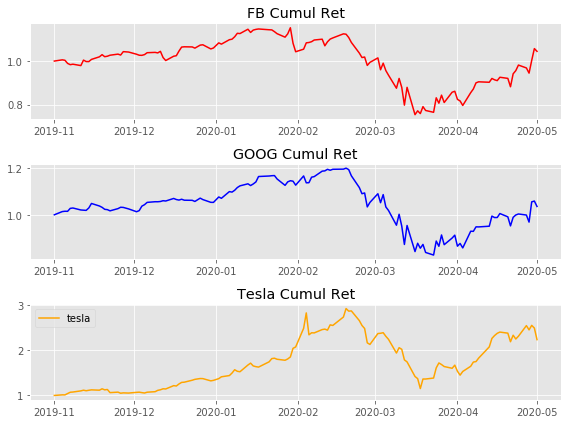

In [161]:
fig,axes= plt.subplots(3,1,figsize=(8,6))
axes[0].plot(covid_fb['Cumul Return'],label='fb',c='r')
axes[0].set_title("FB Cumul Ret")

axes[1].plot(covid_goog['Cumul Return'],label='goog',c='b')
axes[1].set_title("GOOG Cumul Ret")

axes[2].plot(covid_tesla['Cumul Return'],label='tesla',c='orange')
axes[2].set_title("Tesla Cumul Ret")
plt.tight_layout()
plt.legend()

#### Commentary:
The analysis of the daily cumulative returns shows how badly the coranivrus impacted the performance of Ford and GM, whereas the tech compagnies and Tesla seem to have quickly recovered from the market crash. 
